In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc_score

## Loading Dataset

In [2]:
df = pd.read_csv(r"..\clean_data\cars_usa_clean.csv")
print("List of Columns:", df.columns.to_list())
df.head()

List of Columns: ['brand', 'model_year', 'milage', 'fuel_type', 'ext_col', 'int_col', 'accident', 'price', 'horsepower', 'displacement', 'cylinders', 'transmission_type', 'gears']


,brand,model_year,milage,fuel_type,ext_col,int_col,accident,price,horsepower,displacement,cylinders,transmission_type,gears
0,13,2013,51000.0,1,0,0,0,0,300.0,3.7,6.0,0,6.0
1,18,2021,34742.0,3,6,3,0,1,240.0,3.8,6.0,0,8.0
2,25,2022,22372.0,3,1,0,1,2,301.0,3.5,6.0,0,8.0
3,19,2015,88900.0,4,0,0,1,0,354.0,3.5,6.0,0,7.0
4,3,2021,9835.0,3,9,0,1,1,333.0,2.0,4.0,0,8.0


In [3]:
dfY, dfX = df['price'], df.drop(columns=['price'])
xtrain, xtest, ytrain, ytest = train_test_split(dfX, dfY, test_size=0.30, random_state=42)
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

(2675, 12) (1147, 12) (2675,) (1147,)


In [4]:
fuel_type =  {'Diesel': 0, 'E85 Flex Fuel': 1, 'Electric': 2, 'Gasoline': 3, 'Hybrid': 4, 'Plug-In Hybrid': 5}

accident = {'At least 1 accident or damage reported': 0, 'None reported': 1}

brand = {
    'Acura': 0, 'Alfa': 1, 'Aston': 2, 'Audi': 3, 'BMW': 4, 'Bentley': 5, 'Buick': 6, 'Cadillac': 7, 'Chevrolet': 8, 
    'Chrysler': 9, 'Dodge': 10, 'FIAT': 11, 'Ferrari': 12, 'Ford': 13, 'GMC': 14, 'Genesis': 15, 'Honda': 16, 'Hummer': 17, 
    'Hyundai': 18, 'INFINITI': 19, 'Jaguar': 20, 'Jeep': 21, 'Kia': 22, 'Lamborghini': 23, 'Land': 24, 'Lexus': 25, 
    'Lincoln': 26, 'Lotus': 27, 'Lucid': 28, 'MINI': 29, 'Maserati': 30, 'Maybach': 31, 'Mazda': 32, 'McLaren': 33, 
    'Mercedes-Benz': 34, 'Mercury': 35, 'Mitsubishi': 36, 'Nissan': 37, 'Plymouth': 38, 'Pontiac': 39, 'Porsche': 40, 
    'RAM': 41, 'Rivian': 42, 'Rolls-Royce': 43, 'Saab': 44, 'Saturn': 45, 'Scion': 46, 'Subaru': 47, 'Tesla': 48, 
    'Toyota': 49, 'Volkswagen': 50, 'Volvo': 51, 'smart': 52
}

ext_col = {'Black': 0, 'Blue': 1, 'Brown': 2, 'Gray': 3, 'Green': 4, 'Orange': 5, 'Others': 6, 'Purple': 7, 'Red': 8, 'White': 9, 'Yellow': 10}

int_col = {'Black': 0, 'Blue': 1, 'Brown': 2, 'Gray': 3, 'Green': 4, 'Orange': 5, 'Others': 6, 'Red': 7, 'White': 8, 'Yellow': 9}

transmission_type = {'Automatic': 0, 'CVT': 1, 'Manual': 2, 'Unknown': 3}

price = {'very low': 0, 'low': 1, 'medium': 2, 'high': 3, 'very high': 4}

In [5]:
import os

def check_pickle_file(filename):
    return os.path.isfile(filename)

## Training Model

In [8]:
if not check_pickle_file("models/decision_tree_usa.pkl"):
    model = DecisionTreeClassifier()
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    print("Accuracy on Train Set: ", acc_score(ytrain, model.predict(xtrain)))
    print("Accuracy on Test Set: ", acc_score(ytest, ypred))

    with open("models/decision_tree_usa.pkl", "wb") as f:
        pickle.dump(model, f)

with open("models/decision_tree_usa.pkl", "rb") as f:
    model = pickle.load(f)

ypred = model.predict(xtest)
print("Accuracy on Train Set: ", acc_score(ytrain, model.predict(xtrain)))
print("Accuracy on Test Set: ", acc_score(ytest, ypred))

Accuracy on Train Set:  1.0
Accuracy on Test Set:  0.6442894507410637


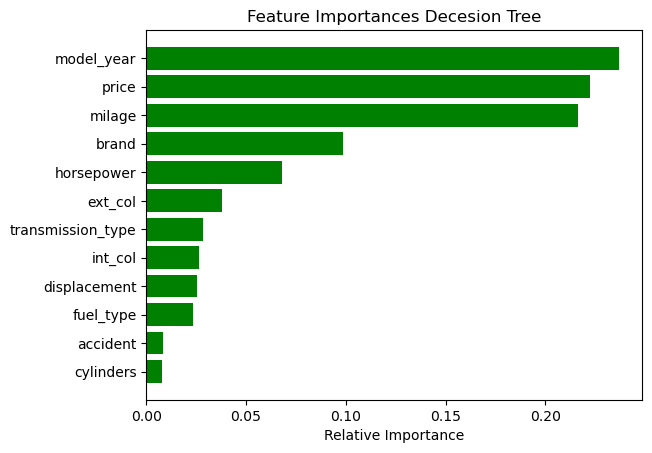

In [9]:
importances = model.feature_importances_
indices = np.argsort(importances)
features = df.columns
plt.title('Feature Importances Decesion Tree')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [10]:
if not check_pickle_file("models/random_forest_usa.pkl"):
    model = RandomForestClassifier()
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    print("Accuracy on Train Set: ", acc_score(ytrain, model.predict(xtrain)))
    print("Accuracy on Test Set: ", acc_score(ytest, ypred))

    with open("models/random_forest_usa.pkl", "wb") as f:
        pickle.dump(model, f)

with open("models/random_forest_usa.pkl", "rb") as f:
    model = pickle.load(f)

ypred = model.predict(xtest)
print("Accuracy on Train Set: ", acc_score(ytrain, model.predict(xtrain)))
print("Accuracy on Test Set: ", acc_score(ytest, ypred))

Accuracy on Train Set:  1.0
Accuracy on Test Set:  0.7332170880557978


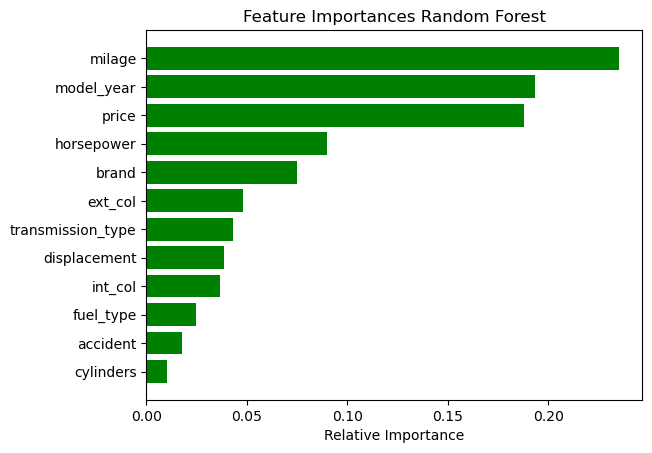

In [11]:
importances = model.feature_importances_
indices = np.argsort(importances)
features = df.columns
plt.title('Feature Importances Random Forest')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [12]:
if not check_pickle_file("models/xgb_usa.pkl"):
    model = XGBClassifier()
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    print("Accuracy on Train Set: ", acc_score(ytrain, model.predict(xtrain)))
    print("Accuracy on Test Set: ", acc_score(ytest, ypred))

    with open("models/xgb_usa.pkl", "wb") as f:
        pickle.dump(model, f)

with open("models/xgb_usa.pkl", "rb") as f:
    model = pickle.load(f)

ypred = model.predict(xtest)
print("Accuracy on Train Set: ", acc_score(ytrain, model.predict(xtrain)))
print("Accuracy on Test Set: ", acc_score(ytest, ypred))

Accuracy on Train Set:  1.0
Accuracy on Test Set:  0.7367044463818657


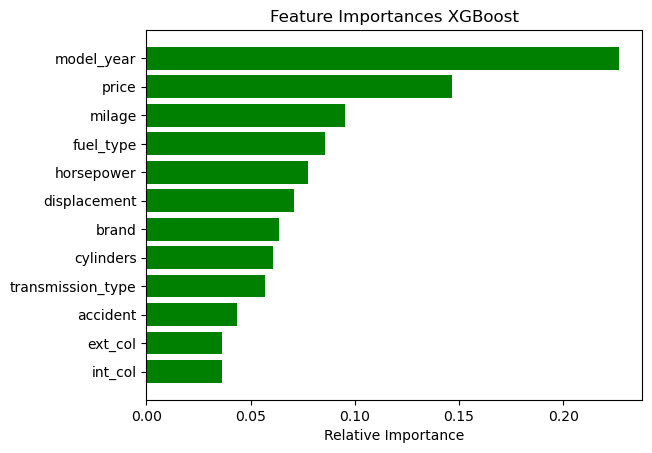

In [13]:
importances = model.feature_importances_
indices = np.argsort(importances)
features = df.columns
plt.title('Feature Importances XGBoost')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [14]:
if not check_pickle_file("models/svm_usa.pkl"):
    model = SVC(C=1e5)
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    print("Accuracy on Train Set: ", acc_score(ytrain, model.predict(xtrain)))
    print("Accuracy on Test Set: ", acc_score(ytest, ypred))

    with open("models/svm_usa.pkl", "wb") as f:
        pickle.dump(model, f)

with open("models/svm_usa.pkl", "rb") as f:
    model = pickle.load(f)

ypred = model.predict(xtest)
print("Accuracy on Train Set: ", acc_score(ytrain, model.predict(xtrain)))
print("Accuracy on Test Set: ", acc_score(ytest, ypred))

Accuracy on Train Set:  0.6328971962616823
Accuracy on Test Set:  0.6102877070619006


In [15]:
if not check_pickle_file("models/mlp_usa.pkl"):
    model = MLPClassifier(hidden_layer_sizes=[256, 256, 256], random_state=42, max_iter=1000, activation="relu")
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    print("Accuracy on Train Set: ", acc_score(ytrain, model.predict(xtrain)))
    print("Accuracy on Test Set: ", acc_score(ytest, ypred))

    with open("models/mlp_usa.pkl", "wb") as f:
        pickle.dump(model, f)

with open("models/mlp_usa.pkl", "rb") as f:
    model = pickle.load(f)

ypred = model.predict(xtest)
print("Accuracy on Train Set: ", acc_score(ytrain, model.predict(xtrain)))
print("Accuracy on Test Set: ", acc_score(ytest, ypred))

Accuracy on Train Set:  0.40523364485981306
Accuracy on Test Set:  0.3984306887532694


## SHAP Analysis

In [16]:
import shap
shap.initjs()

In [17]:
models = {
    'dtree': 'models/decision_tree_usa.pkl',
    'rforest':'models/random_forest_usa.pkl',
    'xgb': 'models/xgb_usa.pkl',
    'svm': 'models/svm_usa.pkl',
    'mlp': 'models/mlp_usa.pkl',
}

shap_bins = {
    'dtree': 'shap_bin/decision_tree_usa.pkl',
    'rforest':'shap_bin/random_forest_usa.pkl',
    'xgb': 'shap_bin/xgb_usa.pkl',
    'svm': 'shap_bin/svm_usa.pkl',
    'mlp': 'shap_bin/mlp_usa.pkl',
}

### Decision Tree

In [18]:
model_name = "dtree"

In [19]:
if not check_pickle_file(models[model_name]):
    with open(models[model_name], "rb") as f:
        model = pickle.load(f)

    explainer = shap.GPUTreeExplainer(model, dfX)
    shap_values_cat = explainer(dfX)

    with open(shap_bins[model_name], "wb") as f:
        pickle.dump(shap_values_cat, f)

with open(shap_bins[model_name], "rb") as f:
    shap_values_cat = pickle.load(f)

#### Feature Contribution

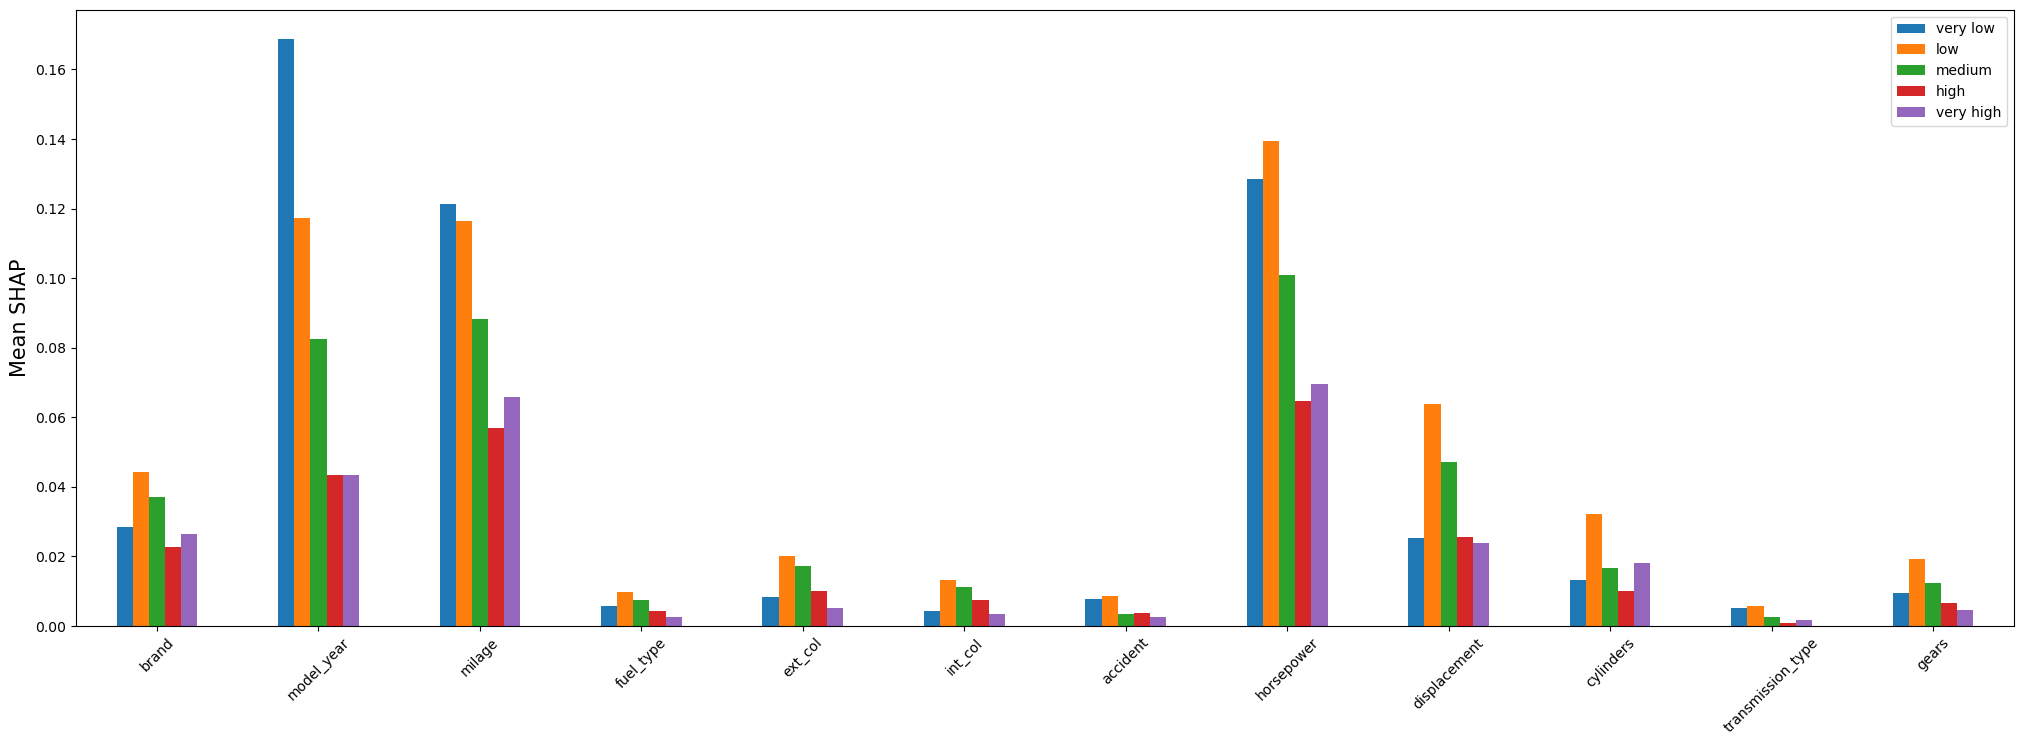

In [20]:
# calculate mean SHAP values for each class
mean_0 = np.mean(np.abs(shap_values_cat.values[:,:,0]),axis=0)
mean_1 = np.mean(np.abs(shap_values_cat.values[:,:,1]),axis=0)
mean_2 = np.mean(np.abs(shap_values_cat.values[:,:,2]),axis=0)
mean_3 = np.mean(np.abs(shap_values_cat.values[:,:,3]),axis=0)
mean_4 = np.mean(np.abs(shap_values_cat.values[:,:,4]),axis=0)

df = pd.DataFrame({'very low': mean_0, 'low': mean_1, 'medium': mean_2, 'high': mean_3, 'very high': mean_4})

# plot mean SHAP values
fig,ax = plt.subplots(1,1,figsize=(25,8))
df.plot.bar(ax=ax)

ax.set_ylabel('Mean SHAP', size = 15)
ax.set_xticklabels(dfX.columns,rotation=45,size=10)
ax.legend(fontsize=10)

In [21]:
very_low_values = []
low_values = []
medium_values = []
high_values = []
very_high_values = []

for i in range(len(dfX)):
    very_low_values.append(shap_values_cat.values[i][:,0])
    low_values.append(shap_values_cat.values[i][:,1])
    medium_values.append(shap_values_cat.values[i][:,2])
    high_values.append(shap_values_cat.values[i][:,3])
    very_high_values.append(shap_values_cat.values[i][:,4])

In [22]:
original = shap_values_cat.values

##### Very Low Price

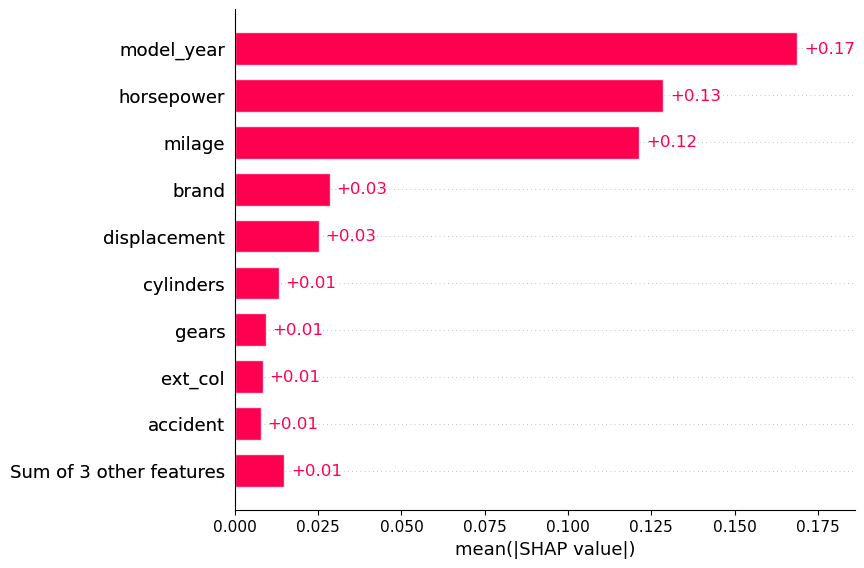

In [23]:
shap_values_cat.values = np.array(very_low_values)
shap.plots.bar(shap_values_cat)

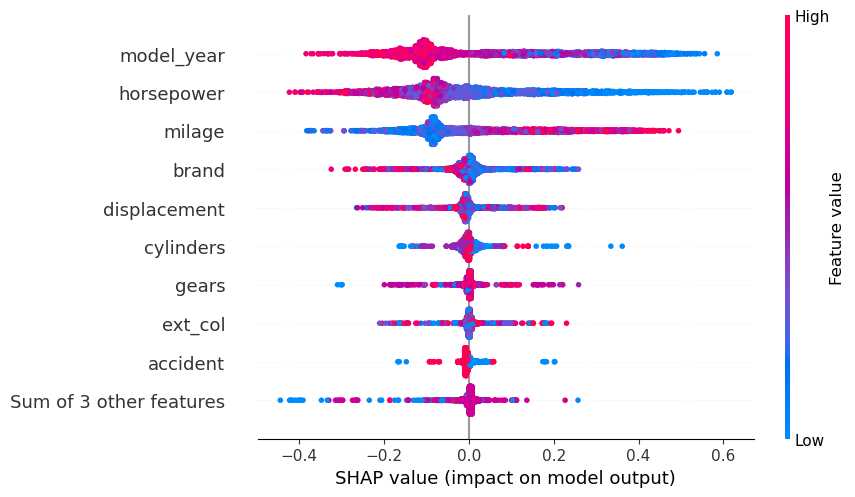

In [24]:
shap.plots.beeswarm(shap_values_cat)

##### Low Price

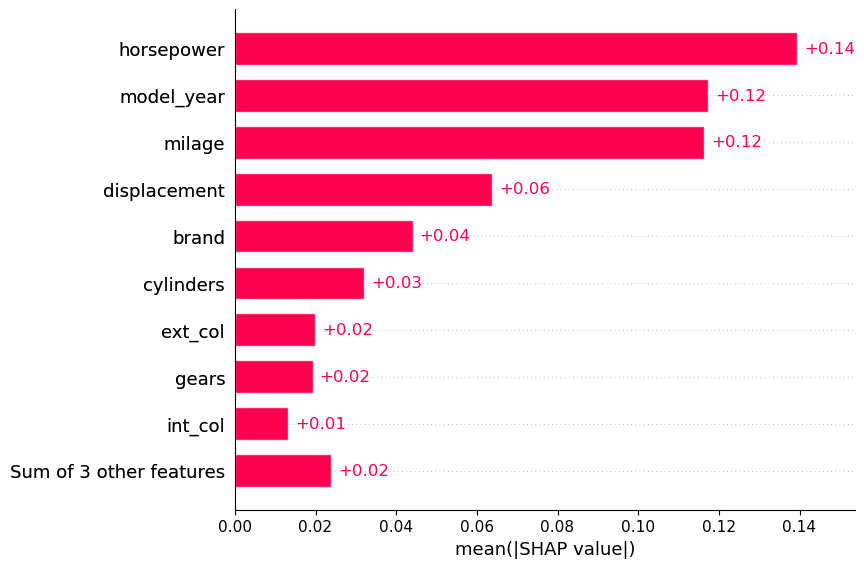

In [25]:
shap_values_cat.values = np.array(low_values)
shap.plots.bar(shap_values_cat)

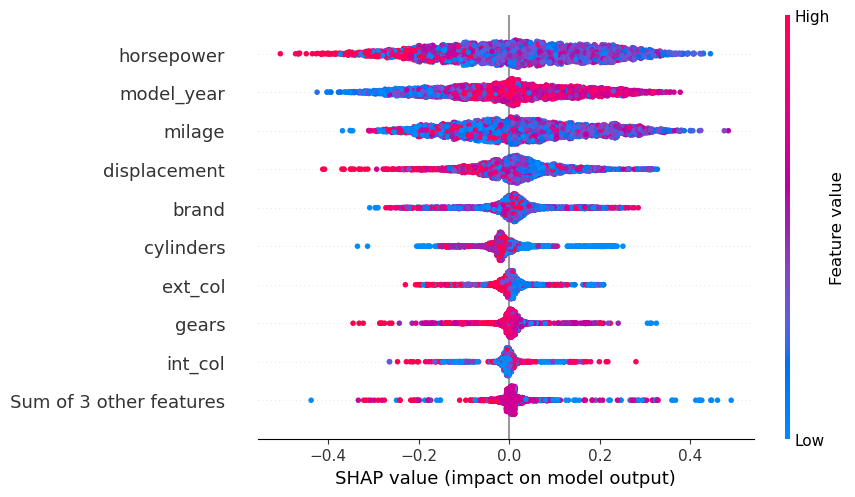

In [26]:
shap.plots.beeswarm(shap_values_cat)

##### Medium Price

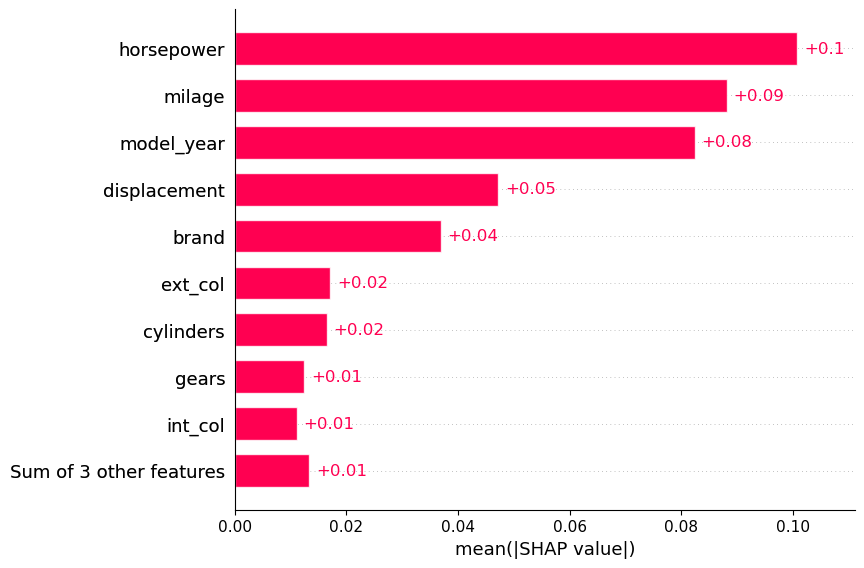

In [27]:
shap_values_cat.values = np.array(medium_values)
shap.plots.bar(shap_values_cat)

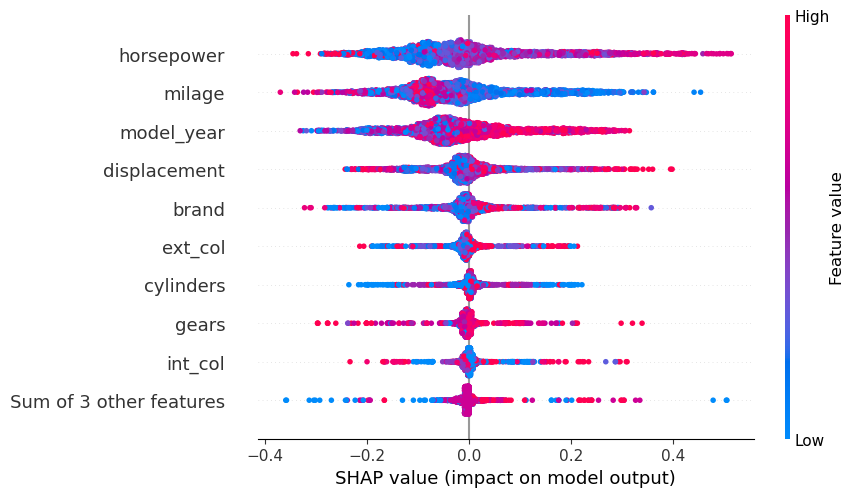

In [28]:
shap.plots.beeswarm(shap_values_cat)

##### High Price

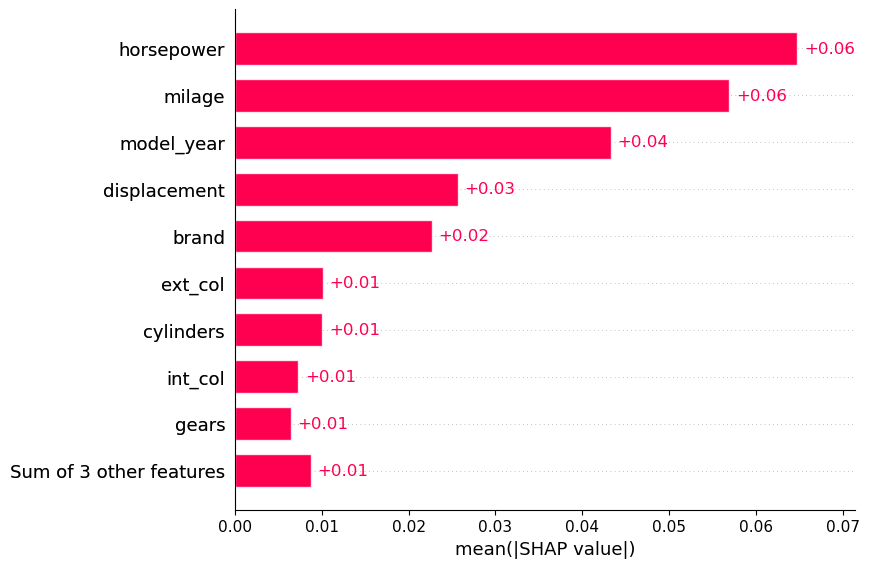

In [29]:
shap_values_cat.values = np.array(high_values)
shap.plots.bar(shap_values_cat)

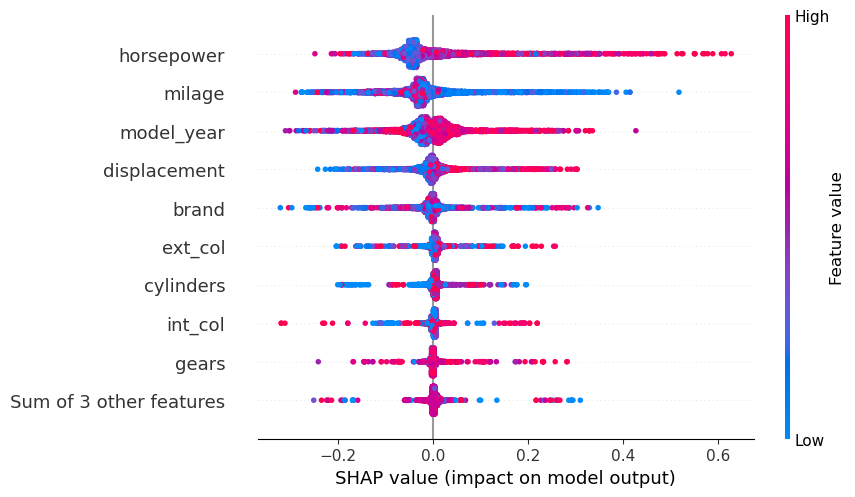

In [30]:
shap.plots.beeswarm(shap_values_cat)

##### Very High Price

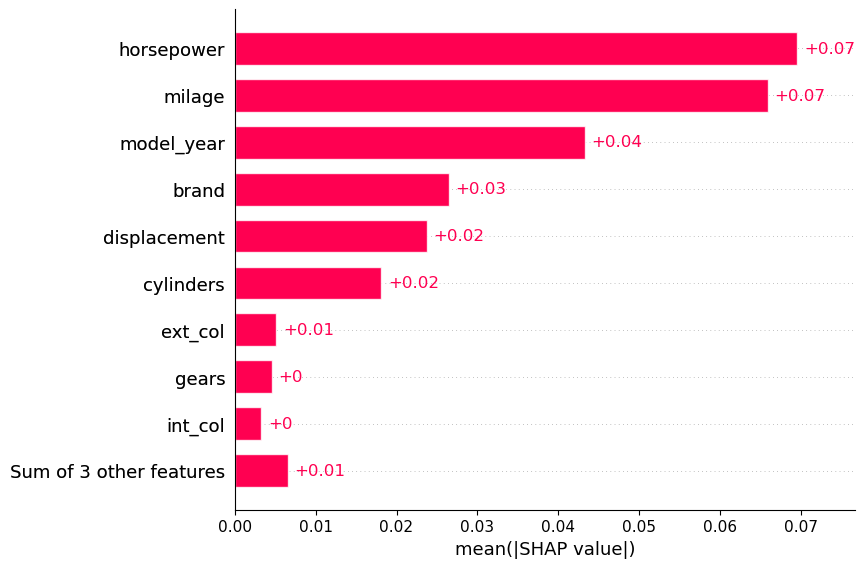

In [31]:
shap_values_cat.values = np.array(very_high_values)
shap.plots.bar(shap_values_cat)

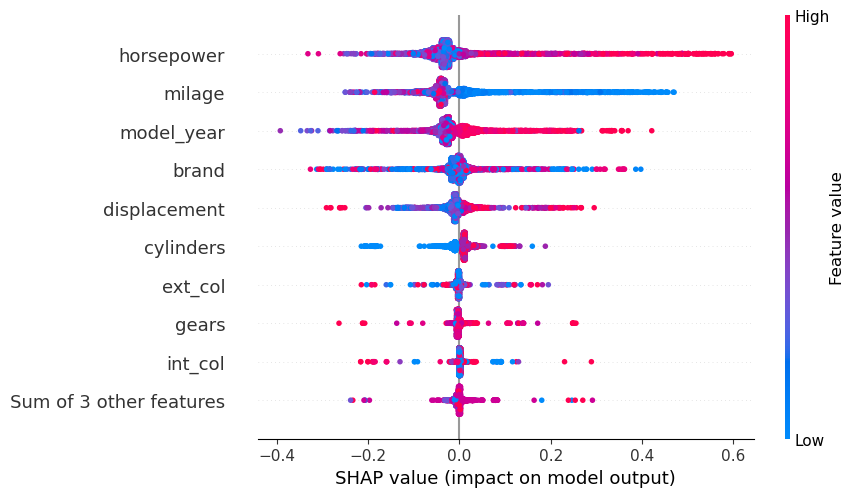

In [32]:
shap.plots.beeswarm(shap_values_cat)

##### Overall Contribution Across Classes

In [33]:
# get model predictions
preds = model.predict(dfX)
shap_values_cat.values = original
new_shap_values = []
for i, pred in enumerate(preds):
    # get shap values for predicted class
    new_shap_values.append(shap_values_cat.values[i][:,pred])

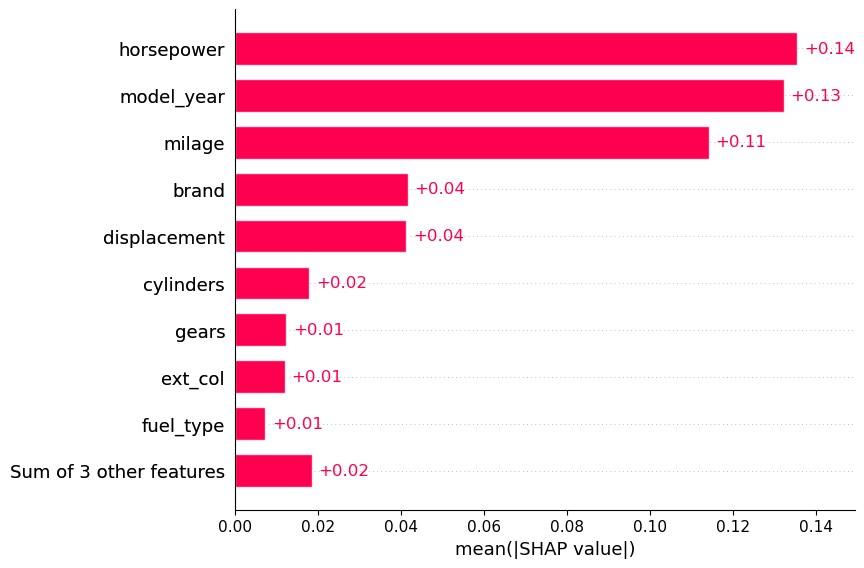

In [34]:
# replace shap values
shap_values_cat.values = np.array(new_shap_values)
shap.plots.bar(shap_values_cat)

### Random Forest

In [35]:
model_name = "rforest"

In [36]:
if not check_pickle_file(models[model_name]):
    with open(models[model_name], "rb") as f:
        model = pickle.load(f)

    explainer = shap.GPUTreeExplainer(model, dfX)
    shap_values_cat = explainer(dfX)

    with open(shap_bins[model_name], "wb") as f:
        pickle.dump(shap_values_cat, f)

with open(shap_bins[model_name], "rb") as f:
    shap_values_cat = pickle.load(f)

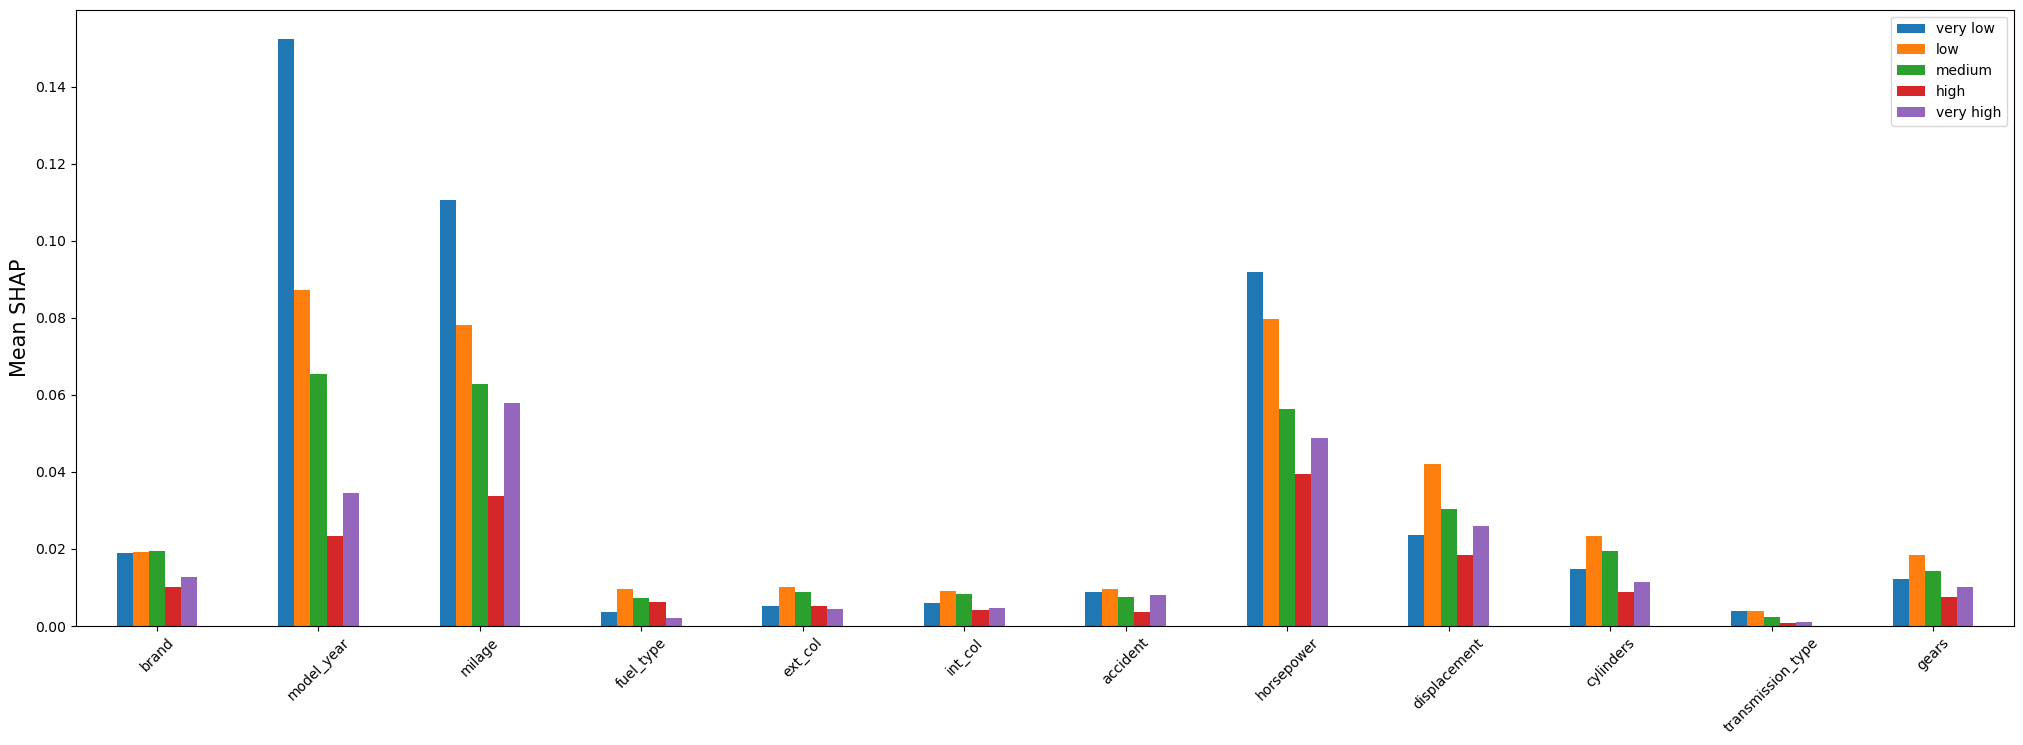

In [37]:
# calculate mean SHAP values for each class
mean_0 = np.mean(np.abs(shap_values_cat.values[:,:,0]),axis=0)
mean_1 = np.mean(np.abs(shap_values_cat.values[:,:,1]),axis=0)
mean_2 = np.mean(np.abs(shap_values_cat.values[:,:,2]),axis=0)
mean_3 = np.mean(np.abs(shap_values_cat.values[:,:,3]),axis=0)
mean_4 = np.mean(np.abs(shap_values_cat.values[:,:,4]),axis=0)

df = pd.DataFrame({'very low': mean_0, 'low': mean_1, 'medium': mean_2, 'high': mean_3, 'very high': mean_4})

# plot mean SHAP values
fig,ax = plt.subplots(1,1,figsize=(25,8))
df.plot.bar(ax=ax)

ax.set_ylabel('Mean SHAP', size = 15)
ax.set_xticklabels(dfX.columns,rotation=45,size=10)
ax.legend(fontsize=10)

In [38]:
very_low_values = []
low_values = []
medium_values = []
high_values = []
very_high_values = []

for i in range(len(dfX)):
    very_low_values.append(shap_values_cat.values[i][:,0])
    low_values.append(shap_values_cat.values[i][:,1])
    medium_values.append(shap_values_cat.values[i][:,2])
    high_values.append(shap_values_cat.values[i][:,3])
    very_high_values.append(shap_values_cat.values[i][:,4])

In [39]:
original_values = shap_values_cat.values

##### Very Low Price

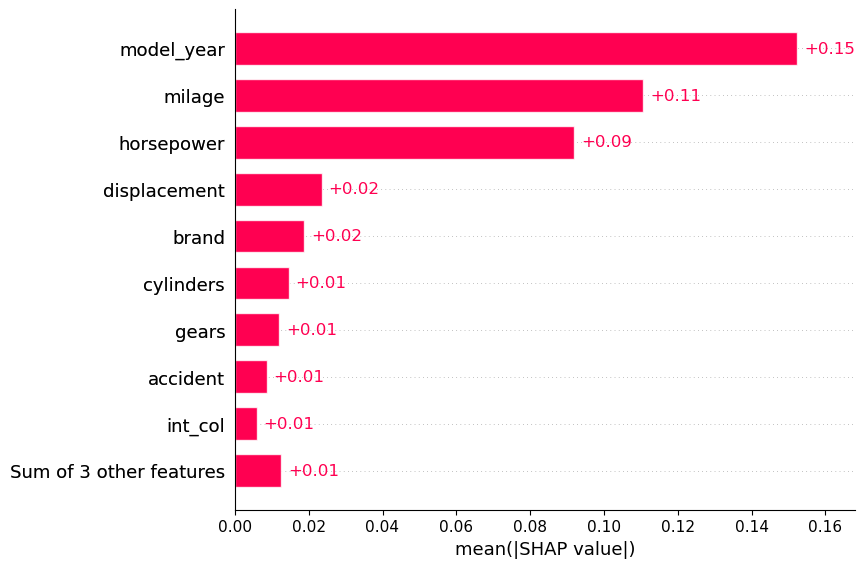

In [40]:
shap_values_cat.values = np.array(very_low_values)
shap.plots.bar(shap_values_cat)

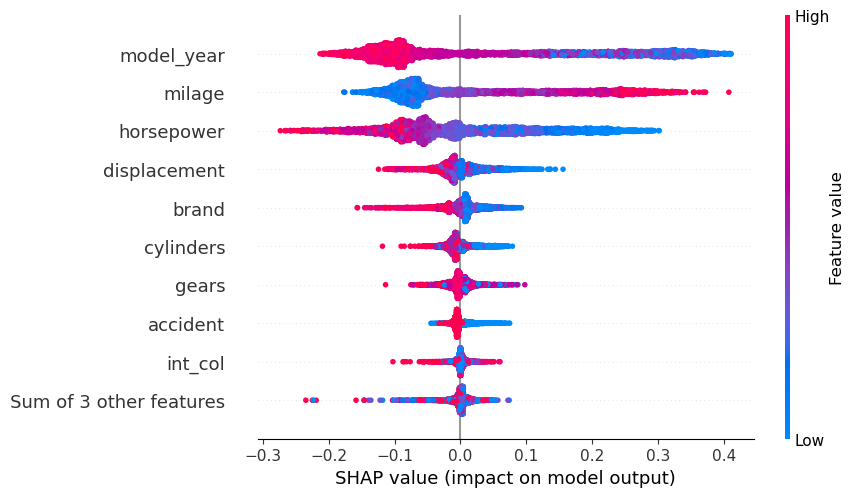

In [41]:
shap.plots.beeswarm(shap_values_cat)

##### Low Price

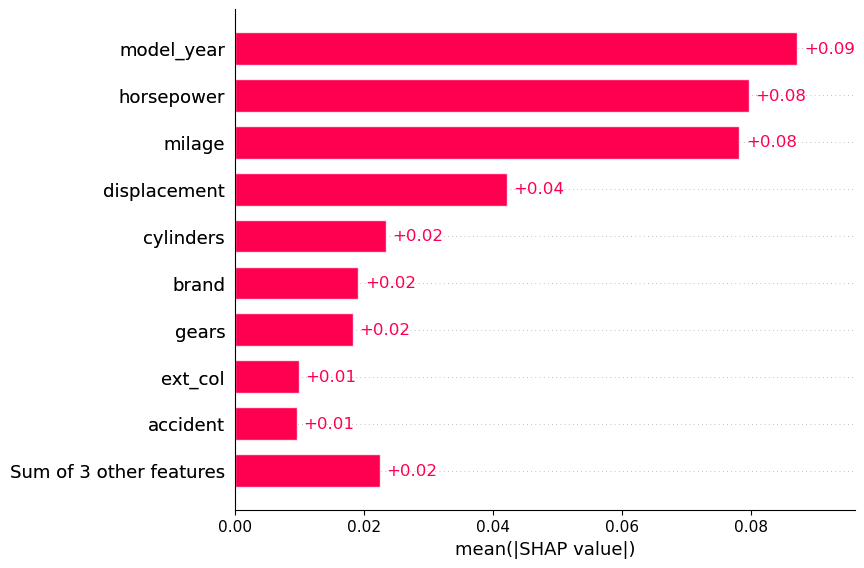

In [42]:
shap_values_cat.values = np.array(low_values)
shap.plots.bar(shap_values_cat)

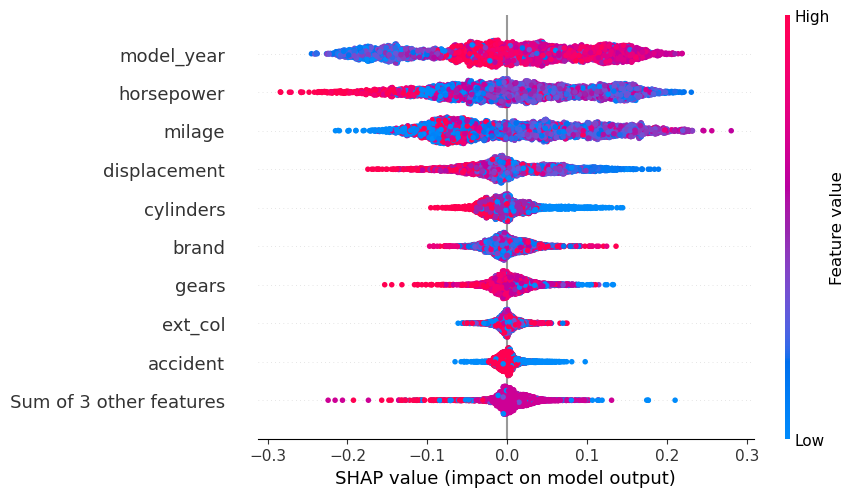

In [43]:
shap.plots.beeswarm(shap_values_cat)

##### Medium Price

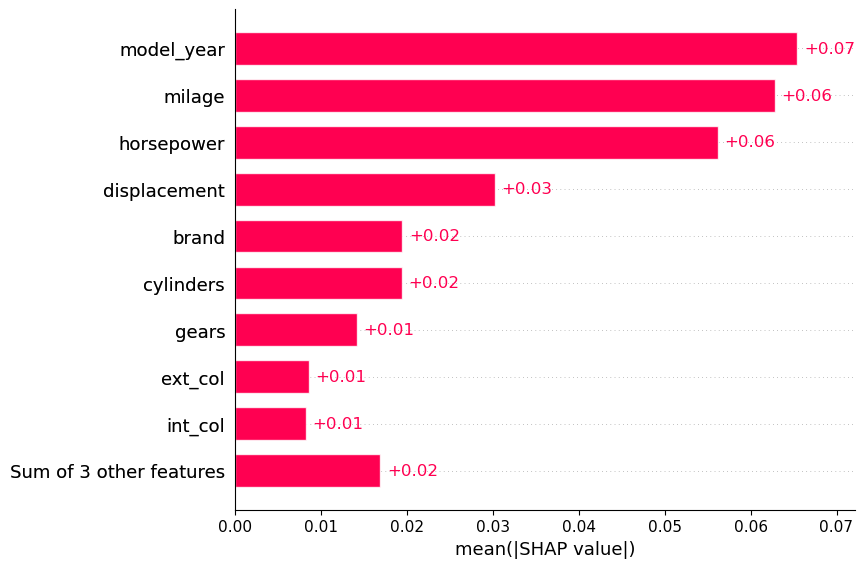

In [44]:
shap_values_cat.values = np.array(medium_values)
shap.plots.bar(shap_values_cat)

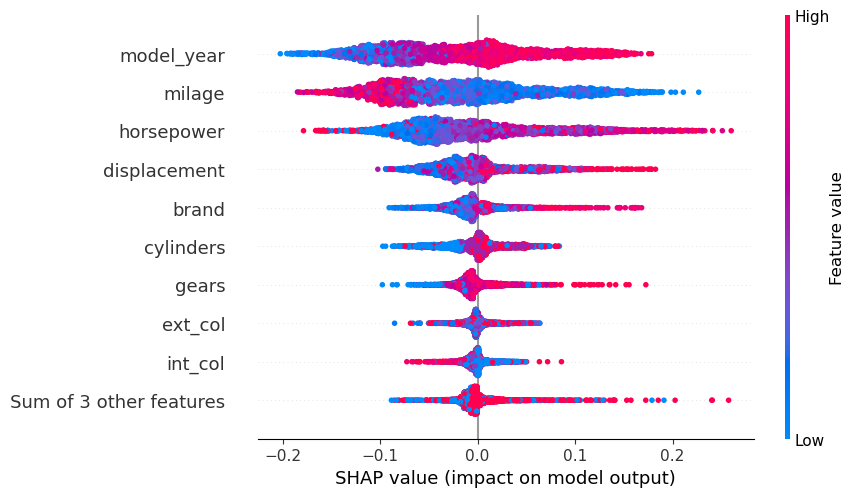

In [45]:
shap.plots.beeswarm(shap_values_cat)

##### High Price

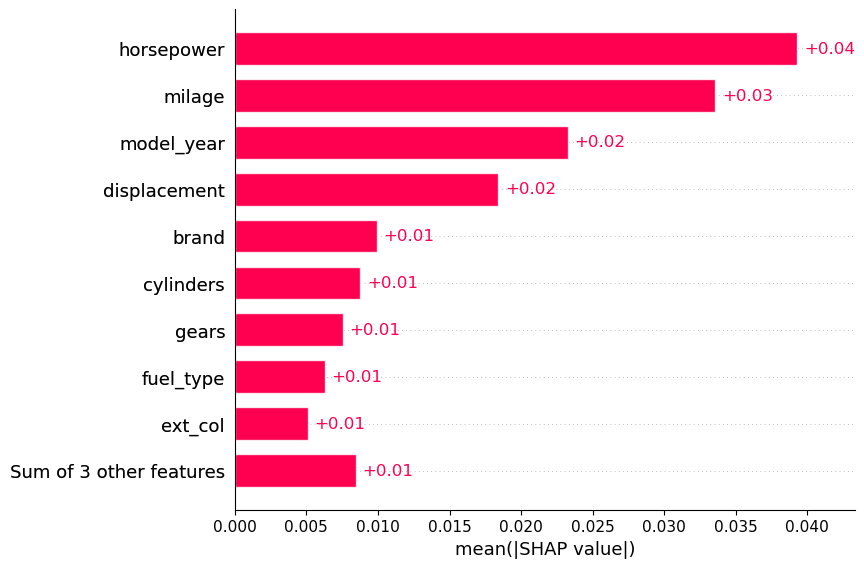

In [46]:
shap_values_cat.values = np.array(high_values)
shap.plots.bar(shap_values_cat)

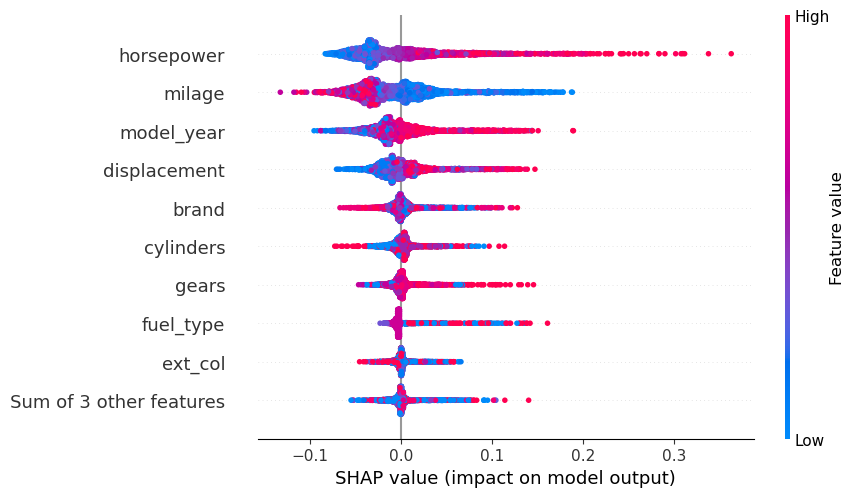

In [47]:
shap.plots.beeswarm(shap_values_cat)

##### Very High Price

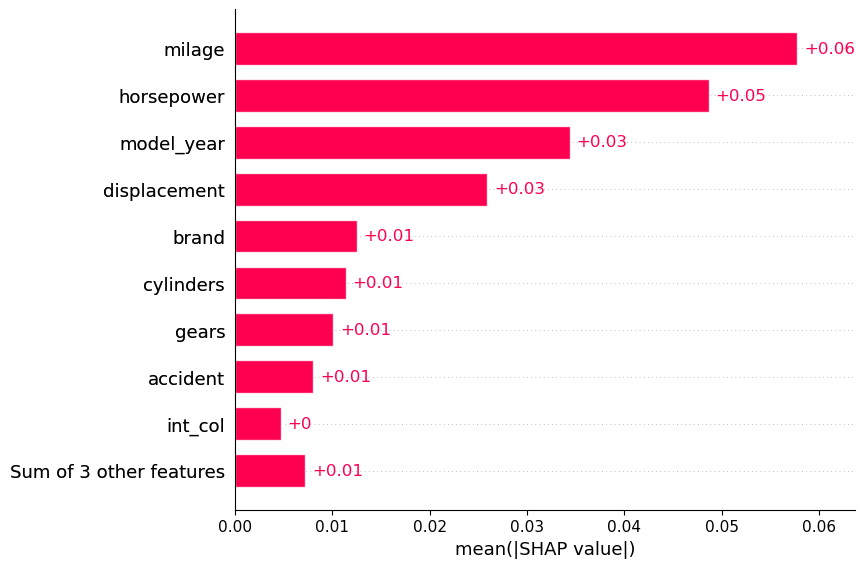

In [48]:
shap_values_cat.values = np.array(very_high_values)
shap.plots.bar(shap_values_cat)

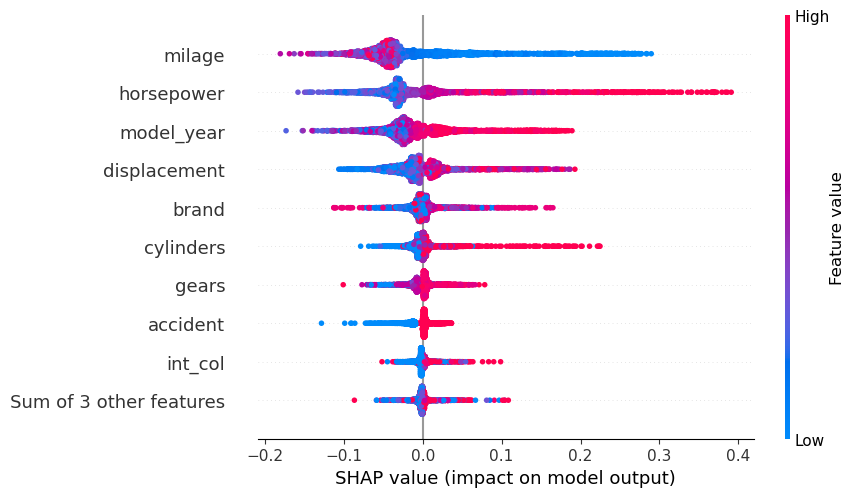

In [49]:
shap.plots.beeswarm(shap_values_cat)

##### Overall Contribution Across Classes

In [50]:
# get model predictions
preds = model.predict(dfX)
shap_values_cat.values = original_values
new_shap_values = []
for i, pred in enumerate(preds):
    # get shap values for predicted class
    new_shap_values.append(shap_values_cat.values[i][:,pred])

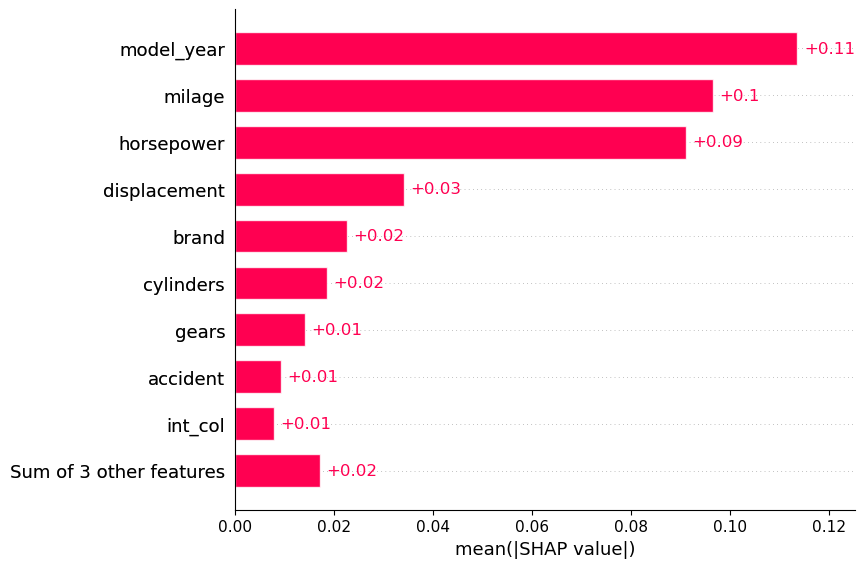

In [51]:
# replace shap values
shap_values_cat.values = np.array(new_shap_values)
shap.plots.bar(shap_values_cat)

### XGB Classifier

In [52]:
model_name = "xgb"

In [53]:
if not check_pickle_file(models[model_name]):
    with open(models[model_name], "rb") as f:
        model = pickle.load(f)

    explainer = shap.GPUTreeExplainer(model, dfX)
    shap_values_cat = explainer(dfX)

    with open(shap_bins[model_name], "wb") as f:
        pickle.dump(shap_values_cat, f)

with open(shap_bins[model_name], "rb") as f:
    shap_values_cat = pickle.load(f)

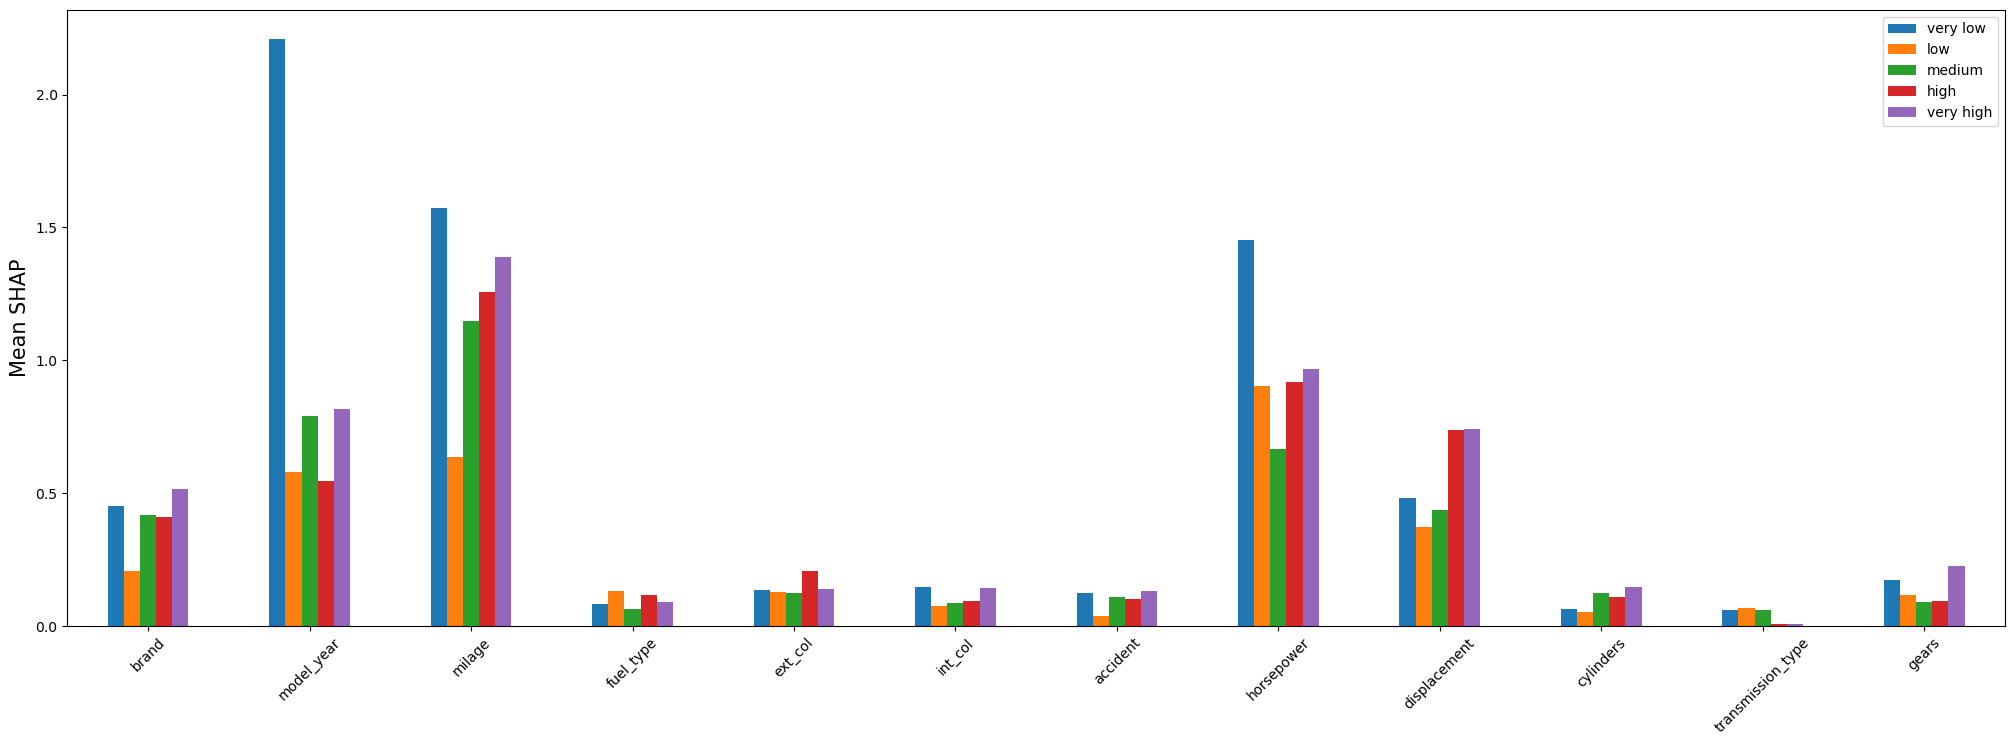

In [54]:
# calculate mean SHAP values for each class
mean_0 = np.mean(np.abs(shap_values_cat.values[:,:,0]),axis=0)
mean_1 = np.mean(np.abs(shap_values_cat.values[:,:,1]),axis=0)
mean_2 = np.mean(np.abs(shap_values_cat.values[:,:,2]),axis=0)
mean_3 = np.mean(np.abs(shap_values_cat.values[:,:,3]),axis=0)
mean_4 = np.mean(np.abs(shap_values_cat.values[:,:,4]),axis=0)

df = pd.DataFrame({'very low': mean_0, 'low': mean_1, 'medium': mean_2, 'high': mean_3, 'very high': mean_4})

# plot mean SHAP values
fig,ax = plt.subplots(1,1,figsize=(25,8))
df.plot.bar(ax=ax)

ax.set_ylabel('Mean SHAP', size = 15)
ax.set_xticklabels(dfX.columns,rotation=45,size=10)
ax.legend(fontsize=10)

In [55]:
very_low_values = []
low_values = []
medium_values = []
high_values = []
very_high_values = []

for i in range(len(dfX)):
    very_low_values.append(shap_values_cat.values[i][:,0])
    low_values.append(shap_values_cat.values[i][:,1])
    medium_values.append(shap_values_cat.values[i][:,2])
    high_values.append(shap_values_cat.values[i][:,3])
    very_high_values.append(shap_values_cat.values[i][:,4])

In [56]:
original_values = shap_values_cat.values

##### Very Low Price

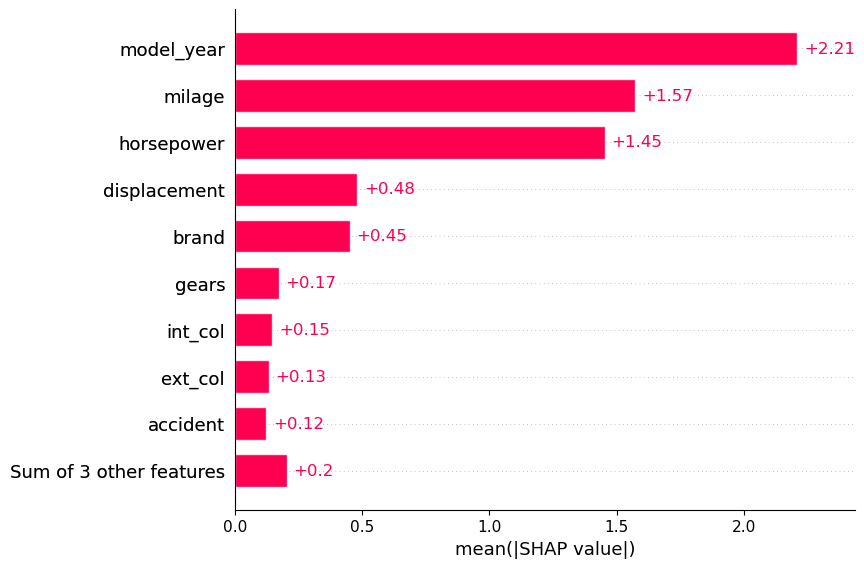

In [57]:
shap_values_cat.values = np.array(very_low_values)
shap.plots.bar(shap_values_cat)

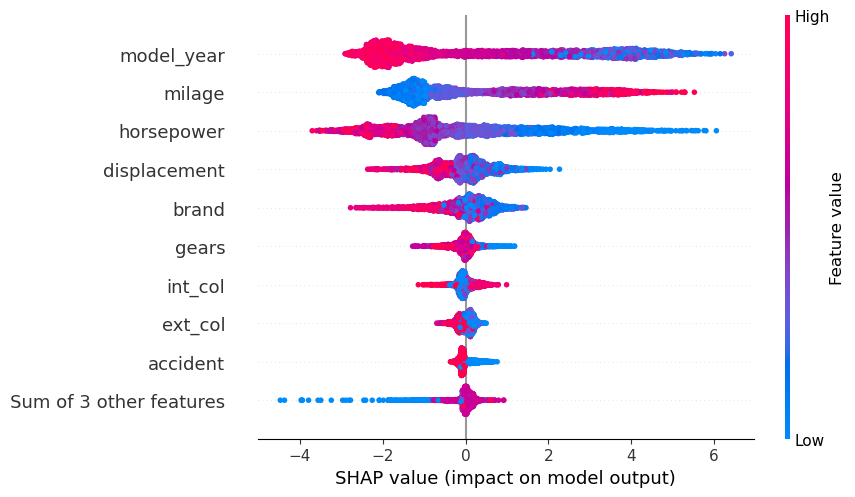

In [58]:
shap.plots.beeswarm(shap_values_cat)

##### Low Price

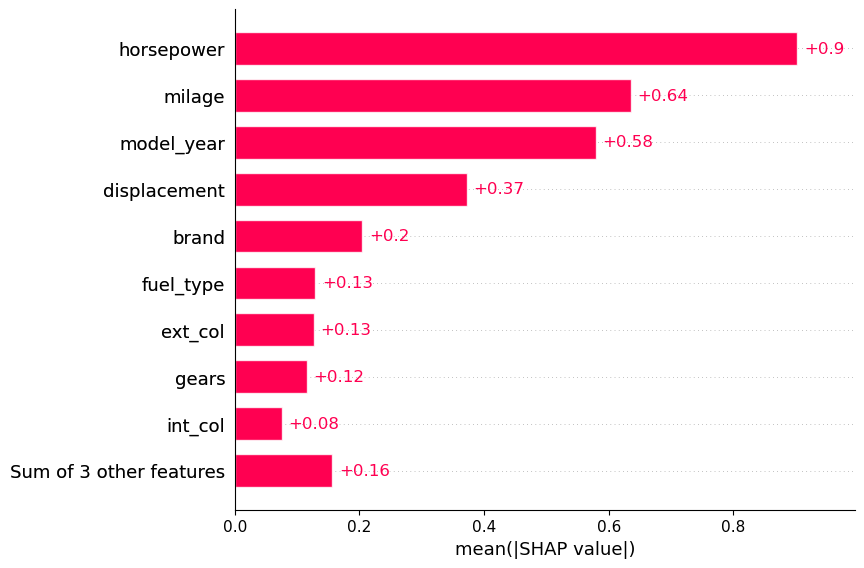

In [59]:
shap_values_cat.values = np.array(low_values)
shap.plots.bar(shap_values_cat)

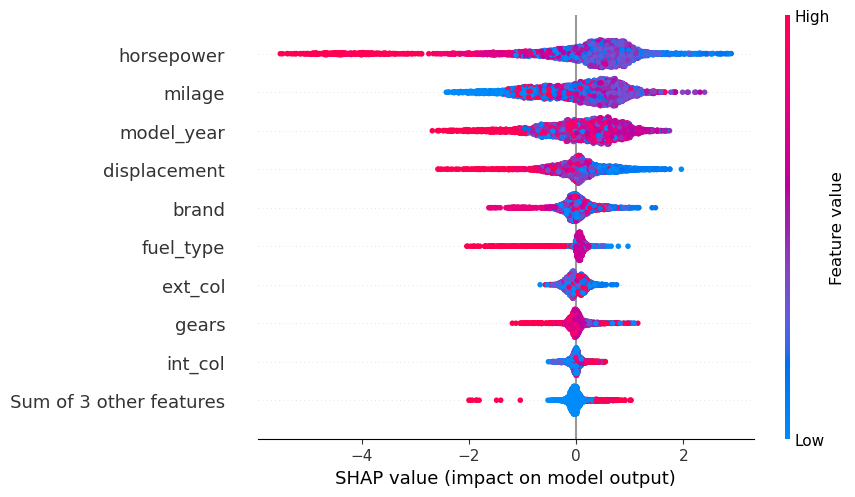

In [60]:
shap.plots.beeswarm(shap_values_cat)

##### Medium Price

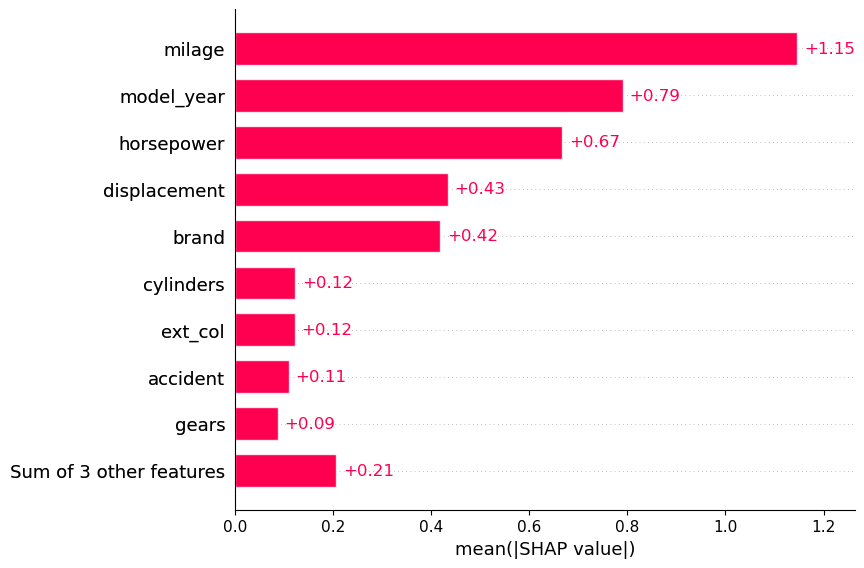

In [61]:
shap_values_cat.values = np.array(medium_values)
shap.plots.bar(shap_values_cat)

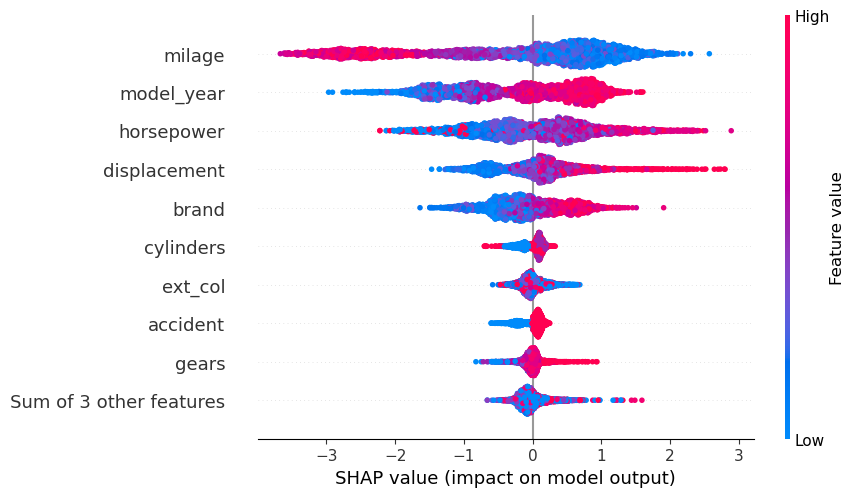

In [62]:
shap.plots.beeswarm(shap_values_cat)

##### High Price

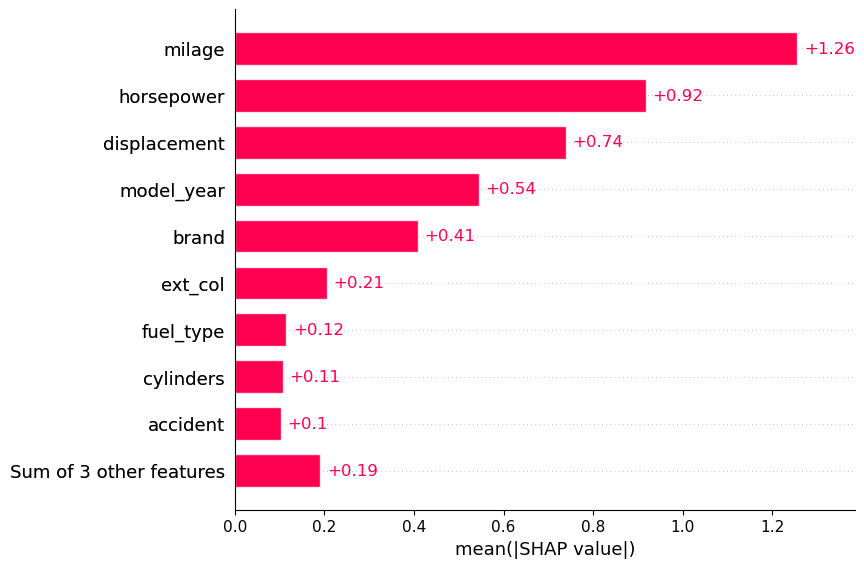

In [63]:
shap_values_cat.values = np.array(high_values)
shap.plots.bar(shap_values_cat)

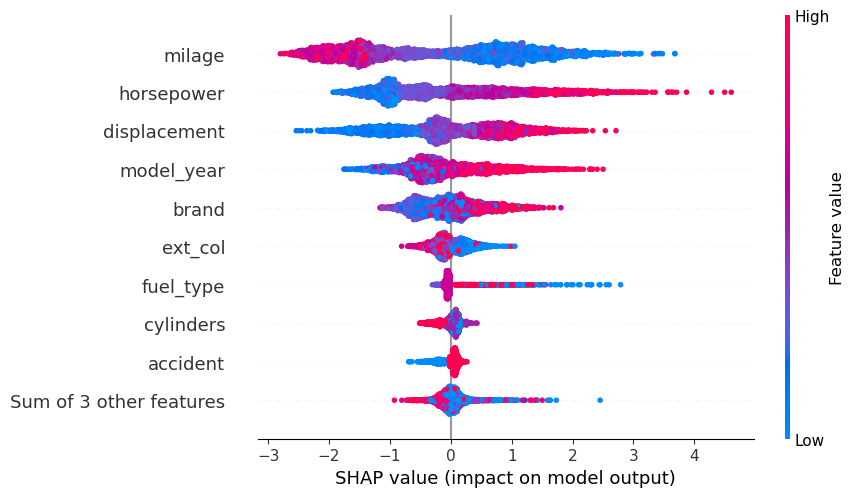

In [64]:
shap.plots.beeswarm(shap_values_cat)

##### Very High Price

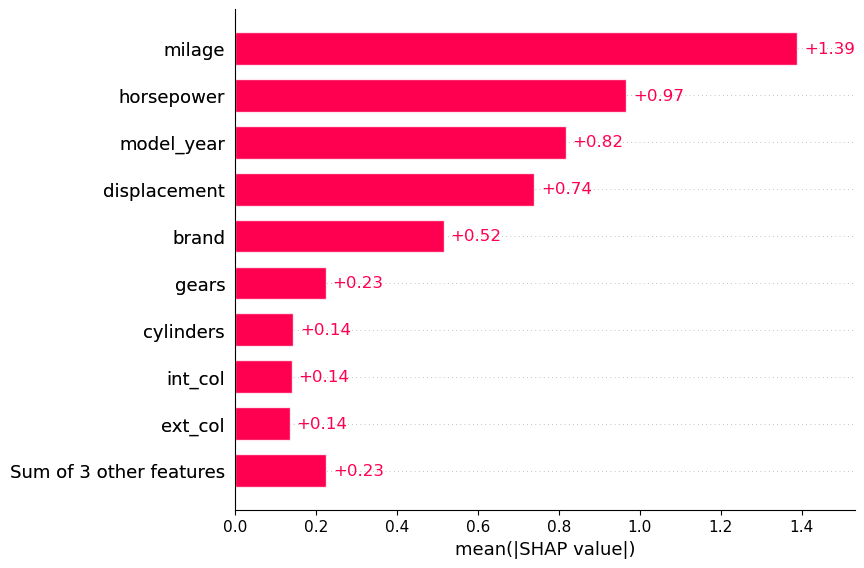

In [65]:
shap_values_cat.values = np.array(very_high_values)
shap.plots.bar(shap_values_cat)

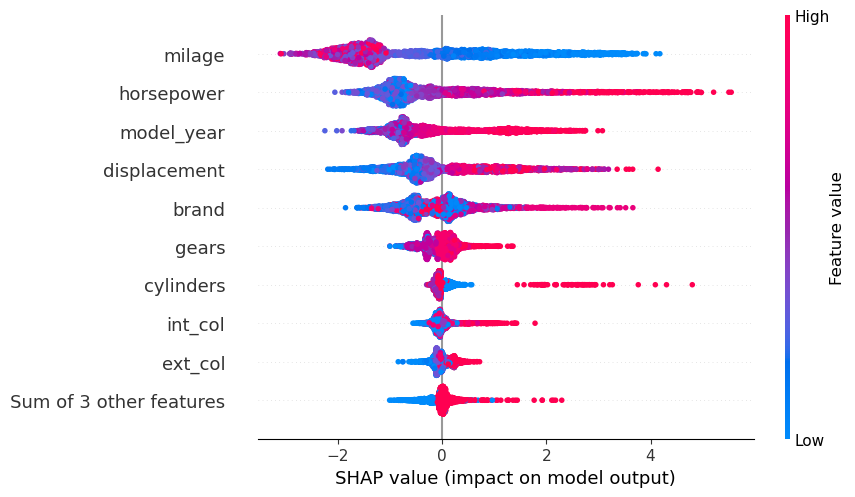

In [66]:
shap.plots.beeswarm(shap_values_cat)

##### Overall Contribution Across Classes

In [67]:
# get model predictions
preds = model.predict(dfX)
shap_values_cat.values = original_values
new_shap_values = []
for i, pred in enumerate(preds):
    # get shap values for predicted class
    new_shap_values.append(shap_values_cat.values[i][:,pred])

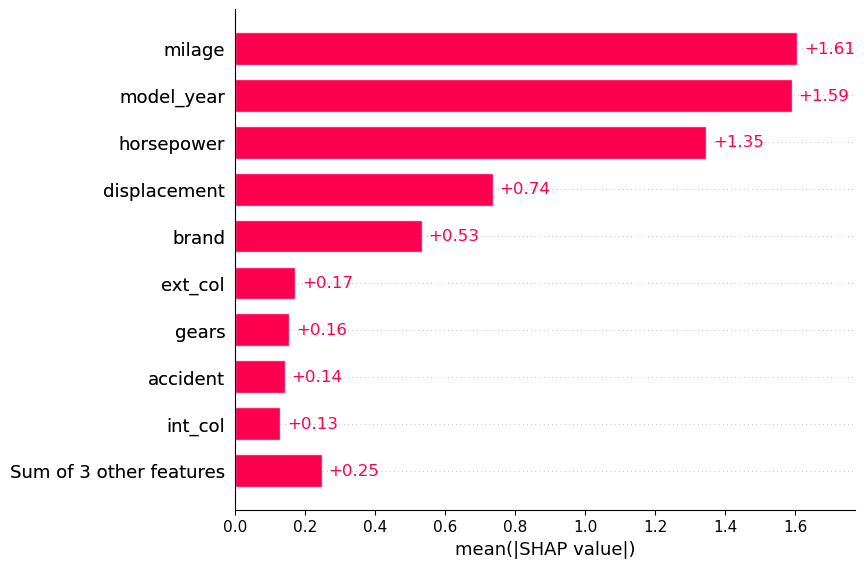

In [68]:
# replace shap values
shap_values_cat.values = np.array(new_shap_values)
shap.plots.bar(shap_values_cat)

### MLP Classifier

In [33]:
model_name = "mlp"

In [ ]:
if not check_pickle_file(models[model_name]):
    with open(models[model_name], "rb") as f:
        model = pickle.load(f)

    explainer = shap.GPUTreeExplainer(model, dfX)
    shap_values_cat = explainer(dfX)

    with open(shap_bins[model_name], "wb") as f:
        pickle.dump(shap_values_cat, f)

with open(shap_bins[model_name], "rb") as f:
    shap_values_cat = pickle.load(f)